In [1]:
%load_ext autoreload
%autoreload 2
    
from leaguesync import * 
from leaguesync.pike13 import logger
import logging

logging.basicConfig()
logger.setLevel(logging.DEBUG)

import warnings

p13 = Pike13('./league-remote.env')

pdf = Pike13DataFrames(p13)

/Users/eric/proj/league-projects/leaguesync/src/leaguesync/pike13.py:702: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  visits[c] = pd.to_datetime(visits[c], errors='ignore')
/Users/eric/proj/league-projects/leaguesync/src/leaguesync/pike13.py:702: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  visits[c] = pd.to_datetime(visits[c], errors='ignore')
/Users/eric/proj/league-projects/leaguesync/src/leaguesync/pike13.py:702: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  visits[c] = pd.to_datetime(visits[c], errors='ignore')
/Users/eric/proj/league-projects/leaguesync/src/leaguesync/pike13.py:702: FutureWarning: errors='ignore' is deprecated an

<Axes: xlabel='visit_month'>

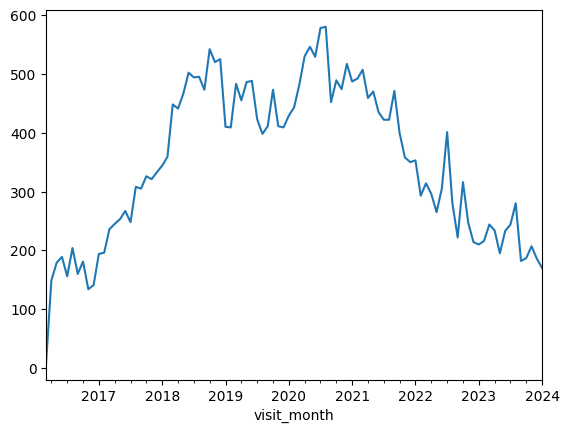

In [2]:

visits = pdf.visits
visits.groupby(visits.visit_month).event_occurrence_id.nunique().plot()


/Users/eric/proj/league-projects/leaguesync/src/leaguesync/pike13.py:685: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  evento[c] = pd.to_datetime(evento[c], errors='ignore')
/Users/eric/proj/league-projects/leaguesync/src/leaguesync/pike13.py:685: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  evento[c] = pd.to_datetime(evento[c], errors='ignore')


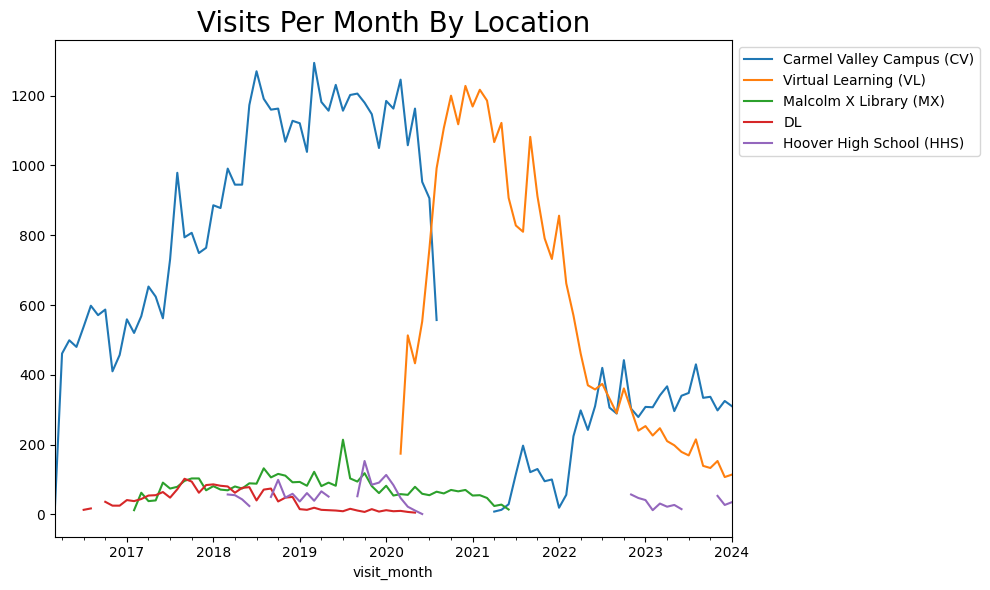

In [3]:
t = pdf.visits\
    .merge(pdf.event_occurrences[['event_occurrence_id','event_id','location_id']], on ='event_occurrence_id', how='left')\
    .merge(pdf.locations, on='location_id',how='left')\
    .merge(pdf.events[['event_id','event_name','service_id','service_type']], on ='event_id', how='left')

def get_name(v):
    names = ['SMH','WMS','SEM','DL','SMD','VL','LH','SM','Gompers']
    import re
    for e in  re.split('@|\s', v):
        if e in names:
            return e
    return None

t.loc[t.location_name.isnull(),'location_name'] = t[t.location_name.isnull()]['event_name'].apply(get_name)

import matplotlib.pyplot as plt

z = t.groupby(['visit_month', 'location_name']).visit_id.count().to_frame('n').unstack(-1)

z.columns = z.columns.droplevel(0)

top_loc = list(t.location_name.value_counts()[:5].index)


ax = z[top_loc].plot(figsize=(10,6))

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_title('Visits Per Month By Location', fontsize=20)

# Adjust layout to make room for the legend
plt.tight_layout()


In [4]:
pdf.services

,service_id,service_name,type,duration_in_minutes,maximum_clients,category_id,category_name,description,description_short,instructions
0,319359,Java Classes,GroupClass,90,8,93504.0,Group Classes,"<p><img alt="""" src=""https://d1nqv8xdwxria6.clo...","In-person and online instruction in Java, one ...",None
1,319636,Programming Classes,GroupClass,90,8,93504.0,Group Classes,None,"Currently the worlds most popular language, Py...",None
2,304450,AI Camp,Course,60,7,93521.0,Camps,"<p><img alt="""" src=""https://d1nqv8xdwxria6.clo...",None,"Location: 12625 High Bluff Dr #113, San Diego,..."
3,320135,Intro to Python Camp,Course,60,10,93521.0,Camps,"<b><img width=""624"" alt="""" src=""https://lh7-us...",None,"<p>Welcome...before your first day of class, w..."
4,320134,Intro to Java Camp,Course,60,10,93521.0,Camps,"<b><img width=""624"" alt="""" src=""https://lh7-us...",None,<b><p>Welcome...before your first day of class...
5,221389,Slam - 4 Day,Course,60,10,78358.0,Slams,<b>HOLIDAY SLAM is an opportunity for students...,,None
6,233439,Slam - 5 Day,Course,60,10,78358.0,Slams,<p><br></p>Price: $395<br><br>Location: Online...,,
7,191144,CSA AP Prep,GroupClass,90,10,93519.0,Exam Preparation,AP Computer Science A Test Prep class - In thi...,None,None
8,256988,Private Lessons,GroupClass,90,1,93516.0,None,None,None,None
9,319607,Tech Club Meetup,Appointment,90,1,93518.0,Special Topics,None,None,None


In [5]:
from datetime import datetime
import pandas as pd
import pytz 

one_month_ago = datetime.now(pytz.utc) - pd.DateOffset(weeks=2)

t = pdf.event_occurrences
t = t[t['start_at'] > one_month_ago]
t = t.merge(pdf.services[['service_id','service_name','category_name']])
t = t[['event_occurrence_id', 'event_id', 'service_id','location_id',  'event_name', 'service_name',  'start_at']]
t

,event_occurrence_id,event_id,service_id,location_id,event_name,service_name,start_at
0,218789466,12952206,181633,30565,Java@HHS,Java@HHS,2024-01-18 22:00:00+00:00
1,194796811,10722594,263387,22675,Java@CV Skipper,Java@CV,2024-01-18 23:30:00+00:00
2,194789368,6184136,183890,23281,Java@VL Zebra,Java@SMM,2024-01-19 01:00:00+00:00
3,194790880,8547623,263387,22675,Java@CV Deer,Java@CV,2024-01-19 01:00:00+00:00
4,194794824,8725790,263387,22675,Java@CV Dugong,Java@CV,2024-01-19 01:00:00+00:00
...,...,...,...,...,...,...,...
1242,205459085,4950771,191042,22675,Java@CV Gnu,Java@VL,2024-05-30 01:30:00+00:00
1243,205459087,8819754,191042,23281,Java@VL Camel,Java@VL,2024-05-30 01:30:00+00:00
1244,224534115,13378382,319359,22675,"Java Beginner ( Levels 0, 1, 2)",Java Classes,2024-05-30 16:00:00+00:00
1245,218789490,12952206,181633,30565,Java@HHS,Java@HHS,2024-05-30 21:00:00+00:00


In [6]:
event_staff_rows = []
for eo in p13.event_occs:
    for staff in eo.get('staff_members',[]):
        event_staff_rows.append({
            'event_occurrence_id': eo['id'],
            'event_id' : eo['event_id'],
            'location_id': eo['location_id'],
            'event_name': eo['name'],
            'staff_id': staff['id'],
            'staff_name': staff['name']
        })

        

In [7]:
pd.DataFrame(event_staff_rows)

,event_occurrence_id,event_id,location_id,event_name,staff_id,staff_name
0,32053044,1411943,22675,[Level 1] @ CV Tiger,2274828,League Admin
1,32055163,1412158,22675,[Level 0] @ CV Penguin,2274828,League Admin
2,32052355,1406853,22675,[Level 2] @ CV Elephant,2274828,League Admin
3,32038901,1407021,22675,[Level 7] @ CV Caterpillar,2274828,League Admin
4,32433659,1433807,22675,[Level 8] @ CV Caterpillar,2274828,League Admin
...,...,...,...,...,...,...
66536,205459085,4950771,22675,Java@CV Gnu,5166821,Mike Johnson
66537,205459087,8819754,23281,Java@VL Camel,7442429,Colby Schexnayder
66538,224534115,13378382,22675,"Java Beginner ( Levels 0, 1, 2)",7101043,Accepting Students
66539,218789490,12952206,30565,Java@HHS,7861875,VA-Tammy Neuhaus


In [23]:
pdf = Pike13DataFrames(p13)
pdf.locations

,location_id,location_name,latitude,longitude,location_code
0,22675,Carmel Valley Campus (CV),32.9474,-117.239,CV
1,23281,Virtual Learning (VL),NaN,NaN,VL
2,30565,Hoover High School (HHS),32.7555,-117.098,HHS
3,27543,Malcolm X Library (MX),32.7108,-117.084,MX
4,37549,Innovation Middle School (IMS),32.8373,-117.174,IMS
5,38591,Millennial Tech Middle School (MT),32.7175,-117.089,MT
6,38688,NCRC Center,NaN,NaN,NaN
7,39104,GOLDEN HILL K-8,32.7188,-117.124,NaN
8,39105,MONTGOMERY MIDDLE,32.7885,-117.172,NaN
9,39106,TAFT MIDDLE,32.8017,-117.131,NaN
